# 연관 분석이란?
## 1-1. 연관분석의 정의
- 항목 간 일정한 연관 규칙을 발견하는 분석
- OTT, 금융, 의료, 요식업 등 넓은 분야에서 사용된다.
- 비지도 학습
- Apriori, FP-Growth 알고리즘

## 1-2. 연관규칙 분석

### 연관규칙의 형태
- if-then의 형식, A → B로 표현함.
- if == antecedent, then == consequent
- item set: 구성하는 아이템들 집합 → mutially exclusive여야 한다.

### 연관규칙 주의점: 인과관계는 알 수 없다.
- 상관관계만을 파악한다.
- A → B의 신뢰도 = 0.8일 때,
  - A 산 사람의 80%는 B도 샀다.
  - 함께 자주 나타나는 것뿐. 원인과 결과 관계가 아니다.
1. 관찰 데이터이기 때문이다.
2. 방향성은 그저 수학적 비율일 뿐이다.
3. 상관관계 != 인과관계

### 연관분석 vs 협업 필터링

**<연관분석>**
- 교집합 기반
- 1:n 계산한다.
- 연관성이 높은 상품을 세트로 추출할 수 있다.
- 연관지표가 높은 세트 순서대로 노출
- 상품 노출/세트 상품 구성

**<협업 필터링>**
- 상관관계 기반
- 1:1 계산
- 개인 선호도에 따라 추출 가능
- 유사도 순위대로 추출
- 개인화된 상품 추천

# 2. 주요 개념
## 2-1. (적절한) 연관규칙의 조건
1. 함께 구매한 수가 일정 이상의 지지도를 만족해야 한다.
2. A를 샀을 때 B를 산 게 일정 이상의 신뢰도를 만족해야 한다.

### 지지도(Support)
전체 거래 중 A와 B가 동시에 포함하는 거래의 비율<br/><br/>
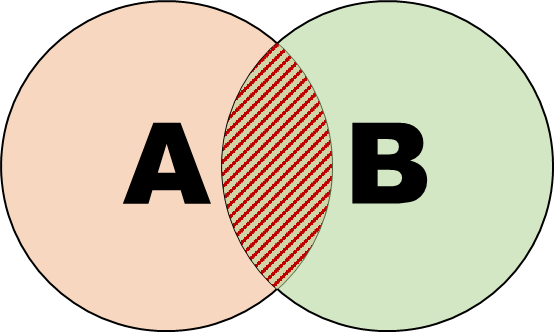
$$지지도 = P(A \cap B)$$
- 교과서적 정의: $P(A)$
> 지지도는 현실에서 유의미한 규칙인지 판단하는 가장 1차적인 기준이다!

### 신뢰도(Confidence)
A를 포함하는 거래 중, A와 B를 동시에 포함하는 거래의 비율<br/><br/>
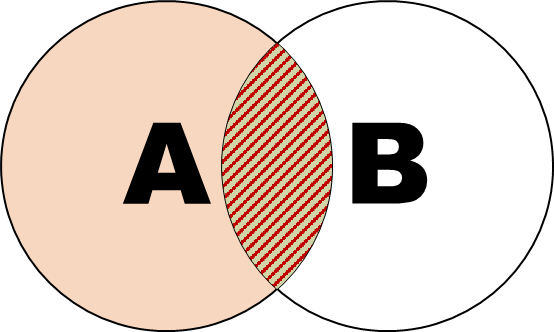
$$신뢰도 = \frac{P(A \cap B)}{P(A)} = \frac{지지도}{P(A)}$$


## 2-2. 연관 분석의 평가 측도

### 향상도(Lift)
A가 없을 때 B의 확률 대비, A가 있을 때 B의 확률 증가 비율
- A, B가 우연히 같이 등장할 확률과 실제 같이 등장할 확률을 비교하자.
$$향상도 = \frac{P(A \cap B)}{P(A)P(B)} = \frac{신뢰도}{P(B)}$$

**1. A와 B가 독립이라면?**
- $P(A∩B)=P(A)⋅P(B)$
- A를 샀다고 B를 사진 않는다 -> 향상도가 1이 됨.

**2. A와 B가 독립이 아니라면?**
- $P(A∩B)=P(A)⋅P(B∣A)=P(B)⋅P(A∣B)$
- $P(A∩B)$에 따라 1보다 크기도 작기도 함.

**3. 실제 동시 발생 확률**
- $P(A∩B) > P(A)P(B)$: 양의 연관성(A를 사면 B도 잘 산다) → 향상도 > 1
- $P(A∩B) < P(A)P(B)$: 음의 연관성(A를 사면 B는 잘 안 산다) → 향상도 < 1


# 3. 활용 사례

### 넷플릭스의 **HOUSE of CARDS**
왜 이런 베팅을 했을까? 근거는 아래와 같다. <br/>
- 이 감독 영화는 시청 완료율이 높다.
- 영국판 영화가 인기 있다.
- 영국판 영화를 본 사람은 케빈 출연 영화나 데이비드 감독 영화를 봤다.

1. 지지도
- 영국판 <하우스 오브 카드> ∩ 케빈 스페이시 콘텐츠. 이 지지도가 높았다.

2. 신뢰도
- 데이비드 감독 영화는 시청 완료율이 높다. P(B|A)가 높았다.

3. 향상도
- 영국판, 케빈 이들의 향상도가 1보다 컸다!

# 4. 연관 분석 알고리즘
## 4-1. Apriori 알고리즘

### 선험적 경험 이용(A Priori)
- 자주 발생하지 않는 조합을 배제하는 방식이다.
- 하나의 조합에서 파생된 다른 조합들까지 배제할 수 있으므로 연산량을 줄일 수 있다.
- {AB}가 최소 지지도를 못 넘으면, {AB}, {ABE}, {ABC} 등 모두 제거한다.

### Apriori 알고리즘 프로세스
1. 단일 항목 집합 생성(지지도 계산 후 최소 지지도 넘는지 확인)
2. 2개 항목 집합 생성(선정된 것들로 조합 생성 후 최소 지지도 못 넘으면 제거)
3. 3개 이상 집합 생성: 계속 반복
4. 최종적으로 각 규칙의 지지도/신뢰도/향상도 계산하여 판단.

### 장점
- 많은 패턴을 발견할 수 있고, 다른 연구가설도 탐지할 수 있다.
- 원리 간단, 이해분석 용이
### 단점
- 비지니스 측면에서 중요한 연관 규칙이 부족할 수 있다.
- 속도 느려질 수 있음

## 4-2. FP Growth 알고리즘
- Apriori 속도 문제를 해결할 수 있게 자료구조를 이용한 알고리즘
- FP-tree(= Tree, Array, Linked list)를 이용한다.
- 모든 거래를 확인하여 각 상품마다 지지도 계산 후 최소 넘는 것만 선택함.
1. 빈발 항목 필터링: 최소지지도 넘는 것만 남김
2. 데이터 빈도순 재정렬
3. FP-tree 생성: 추가된 것들을 숫자로 더하여 빈도 나타내는 듯
4. 빈발 항목 집합 추출
5. 연관 규칙 도출

### 장점
- 데이터를 두 번만 스캔해서 빠르다.
- 후보 item set 안 구해도 된다.

### 단점
- 메모리 측면에서 구리다.
- 설계하기 어렵고, 지지도는 트리 생성 후 계산할 수 있다.